<h1>Exploring Regional and Demographic Analysis of Phillipines household</h1>
<h3>Analyst: Magadia, Reuel & Tabanao, Lee Ann</h3>
<hr>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, spearmanr, ttest_ind
import numpy as np
import seaborn as sns

In [76]:
df = pd.read_csv('Family-Income-and-Expenditure.csv')

In [77]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [79]:
df['Household Head Sex'].value_counts()

Household Head Sex
Male      32483
Female     9061
Name: count, dtype: int64

In [80]:
df['Type of Household'].value_counts()

Type of Household
Single Family                             28445
Extended Family                           12932
Two or More Nonrelated Persons/Members      167
Name: count, dtype: int64

In [81]:
v = df.groupby(['Household Head Sex'])['Total Food Expenditure'].sum()

In [82]:
v

Household Head Sex
Female     745328678
Male      2790030750
Name: Total Food Expenditure, dtype: int64

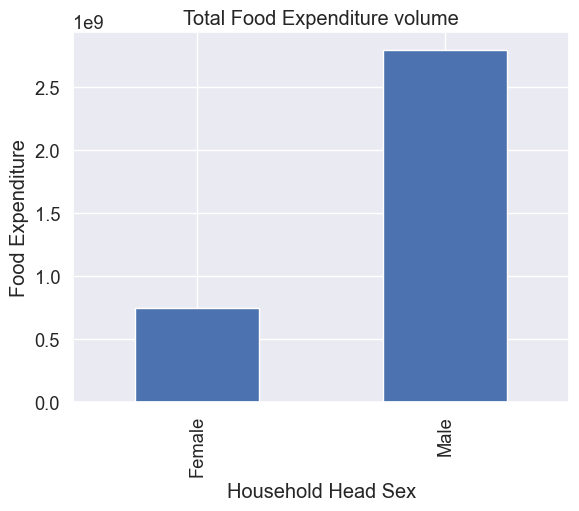

In [83]:
v.plot(kind="bar")
plt.title("Total Food Expenditure volume")
plt.ylabel("Food Expenditure")
plt.xlabel("Household Head Sex")
plt.show()

<hr>
<h2>INSIGHTS 1</h2>
<p> The vast majority of households are headed by males, 
representing 78.19% of the total sample, while female-headed households account for 
the remaining 21.81%. This demographic imbalance is a key driver for all total expenditure 
figures.</p>
<hr>

<hr>
<h2>INSIGHTS 2</h2>
<p>Due to their sheer numbers, male-headed households 
contribute the overwhelming majority of the total food expenditure, accounting for 
78.92% (an absolute total of approximately 2.79 billion) compared to the 21.08% 
(approximately 745.33 million) contributed by female-headed households. </p>
<hr>

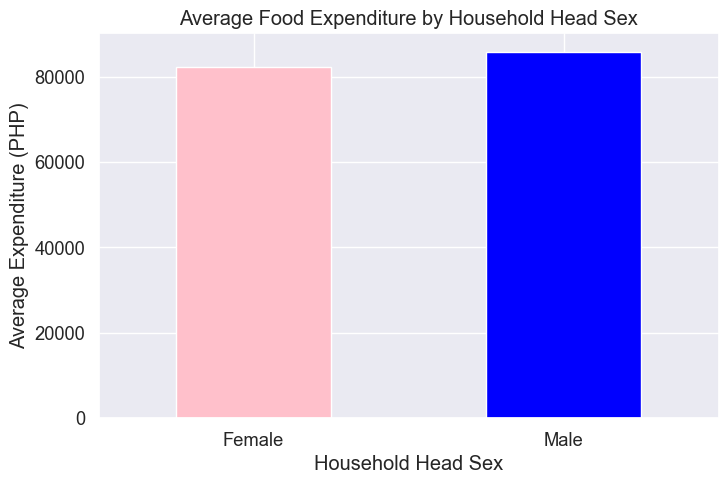

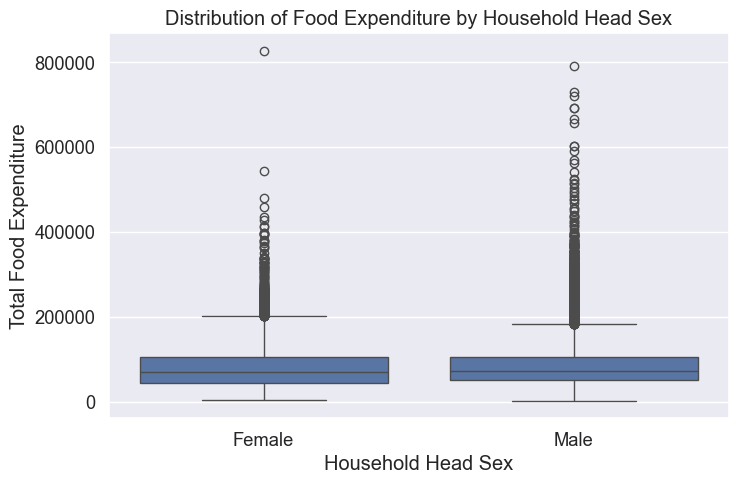

In [84]:
plt.figure(figsize=(8, 5))
food_by_sex.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Food Expenditure by Household Head Sex')
plt.ylabel('Average Expenditure (PHP)')
plt.xlabel('Household Head Sex')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Household Head Sex', y='Total Food Expenditure', data=df)
plt.title('Distribution of Food Expenditure by Household Head Sex')
plt.show()

<hr>
<h2>INSIGHTS 3</h2>
<p>The greatest absolute spending disparity is observed among the most frugal households. 25% of female headed households spend below 43,728, which is 20.55% lower than the spending threshold for the male headed households 52,716. This suggests that the lowest income or most budget constrained households are significantly more likely to be headed by females.</p>
<hr>

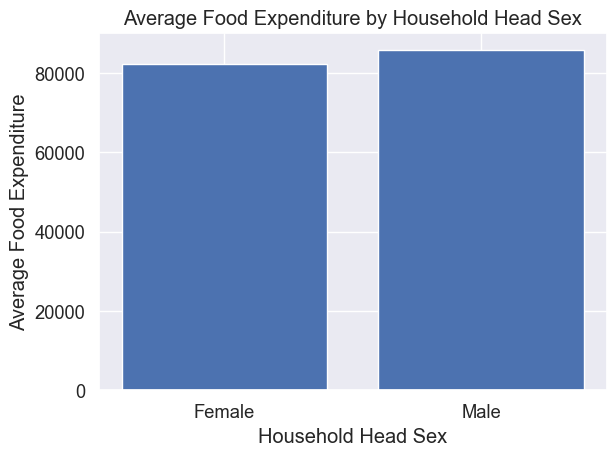

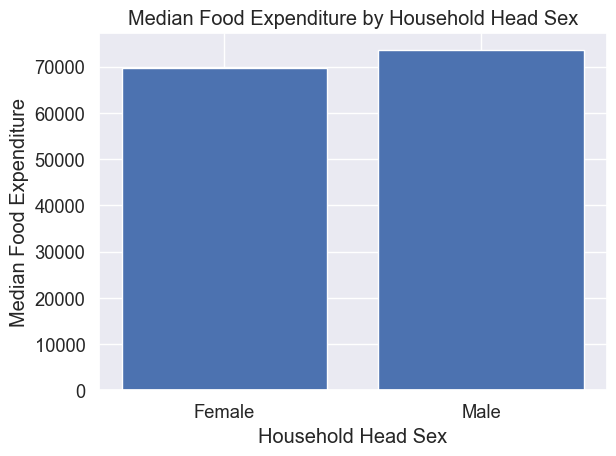

In [85]:
food_by_sex_mean = df.groupby('Household Head Sex')['Total Food Expenditure'].mean()
food_by_sex_median = df.groupby('Household Head Sex')['Total Food Expenditure'].median()

plt.figure()
plt.bar(food_by_sex_mean.index.astype(str), food_by_sex_mean.values)
plt.xlabel("Household Head Sex")
plt.ylabel("Average Food Expenditure")
plt.title("Average Food Expenditure by Household Head Sex")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(food_by_sex_median.index.astype(str), food_by_sex_median.values)
plt.xlabel("Household Head Sex")
plt.ylabel("Median Food Expenditure")
plt.title("Median Food Expenditure by Household Head Sex")
plt.tight_layout()
plt.show()

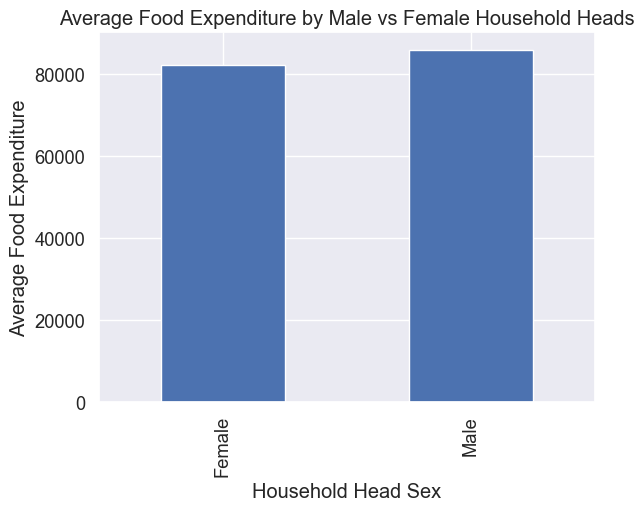

In [86]:
gender_food = df.groupby("Household Head Sex")["Total Food Expenditure"].mean()

gender_food.plot(kind="bar")
plt.title("Average Food Expenditure by Male vs Female Household Heads")
plt.ylabel("Average Food Expenditure")
plt.xlabel("Household Head Sex")
plt.show()


In [87]:
food_by_sex = df.groupby('Household Head Sex')['Total Food Expenditure'].mean()
print("Average Food Expenditure by Household Head Sex:")
print(food_by_sex)

median_food = df.groupby('Household Head Sex')['Total Food Expenditure'].median()
print("\nMedian Food Expenditure:")
print(median_food)

Average Food Expenditure by Household Head Sex:
Household Head Sex
Female    82256.779384
Male      85892.028138
Name: Total Food Expenditure, dtype: float64

Median Food Expenditure:
Household Head Sex
Female    69643.0
Male      73677.0
Name: Total Food Expenditure, dtype: float64


<hr>
<h2>INSIGHTS 4</h2>
<p> Male headed households lead in both standard measures of central tendency. The median food expenditure for Male headed household 73,677 is 5.80% higher than the median for female headed households 69,643. This confirms that a typical male headed household allocates a consistently higher amount to food than a typical female headed house.</p>
<hr>

<hr>
<h2>INSIGHTS 5</h2>
<p>Food expenditure distributions for both sexes are positively skewed, meaning the mean is significantly pulled up by a smaller number of high-spending outliers. The average food expenditure exceeds the median by 18.11% for female head and 16.58% for male head, indicating that relying solely on the average 85,892 or 82,257 would dramatically overestimate the food budget of the majority of households.</p>
<hr>

In [88]:
ast = df.groupby(['Household Head Sex', 'Region'])['Total Household Income'].mean()
ast

Household Head Sex  Region                   
Female               ARMM                        140130.836257
                    CAR                          292991.111111
                    Caraga                       194213.060519
                    I - Ilocos Region            235110.246847
                    II - Cagayan Valley          214934.736211
                    III - Central Luzon          299443.003861
                    IVA - CALABARZON             312022.761770
                    IVB - MIMAROPA               210793.101504
                    IX - Zasmboanga Peninsula    183597.841808
                    NCR                          403787.237691
                    V - Bicol Region             193661.173451
                    VI - Western Visayas         238996.426791
                    VII - Central Visayas        263132.511278
                    VIII - Eastern Visayas       199082.639640
                    X - Northern Mindanao        223017.167500
         

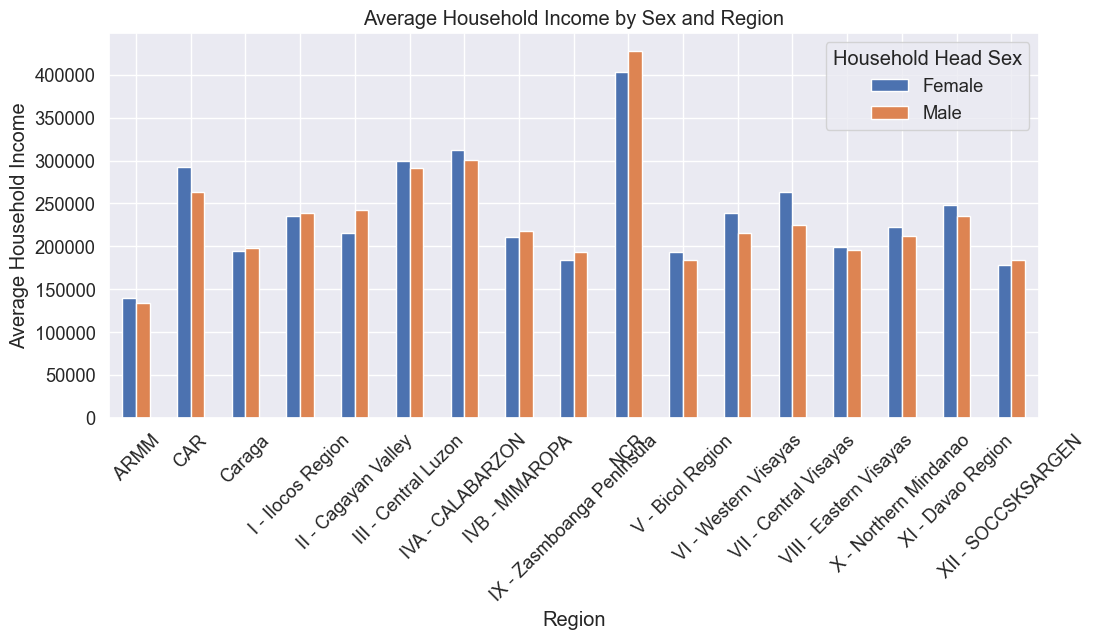

In [89]:
income_region = df.groupby(["Region", "Household Head Sex"])["Total Household Income"].mean().unstack()

income_region.plot(kind="bar", figsize=(12,5))
plt.title("Average Household Income by Sex and Region")
plt.ylabel("Average Household Income")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


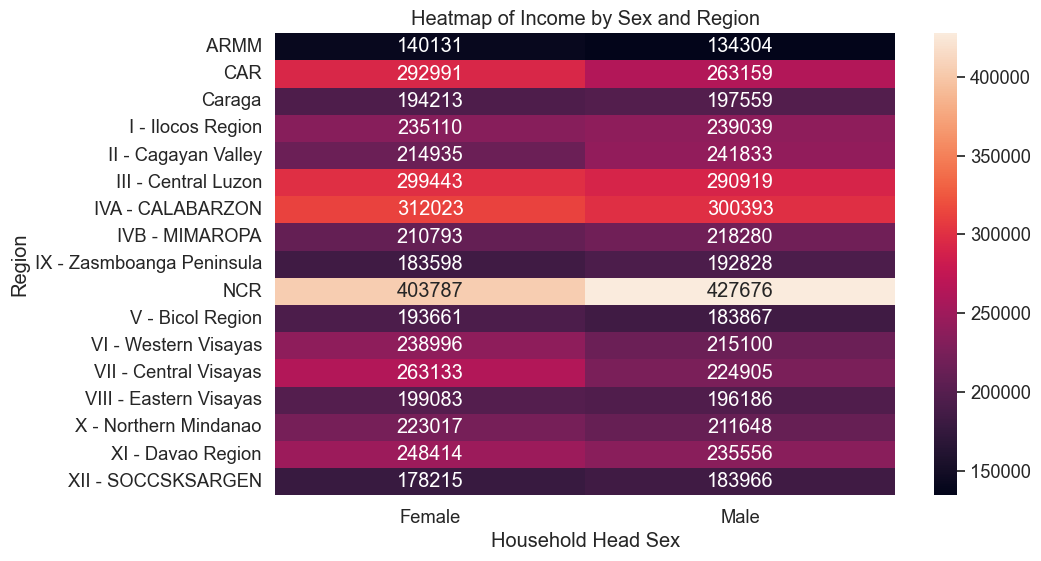

In [90]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(income_region, annot=True, fmt=".0f")
plt.title("Heatmap of Income by Sex and Region")
plt.show()


In [91]:
av_in = df.groupby(['Household Head Sex'])['Total Household Income'].mean()

In [92]:
av_in

Household Head Sex
Female    262804.552257
Male      243301.947696
Name: Total Household Income, dtype: float64

<hr>
<h2>INSIGHTS 6</h2>
<p> Female-headed households have a 7.42% 
higher national average household income (262,805) than male-headed households (243,302). Despite earning more, their average annual food expenditure (82,257) is 4.42% lower than that of male-headed households (85,892). The income expenditure paradox suggests a key difference in budget allocation. Female headed households, despite their higher average income, spend less on food in absolute terms. This implies that they likely allocate a significantly lower proportion of their income to food, potentially prioritizing other expenses such as education, healthcare, or savings. </p>
<hr>

<hr>
<h2>INSIGHTS 7</h2>
<p> The income gap reverses in key areas. In the National Capital Region (NCR), which has the highest overall income, 
male-headed households lead in average income (427,676) by 23,889 over female-headed households (403,787). This suggests that high-tier professional and capital-intensive sectors in the nation's economic center may favor male earners. </p>
<hr>

<hr>
<h2>INSIGHTS 8</h2>
<p> The female income lead is a consistent regional theme. The largest absolute income advantage for female-headed households is in VII - Central Visayas, where the average female-headed house|hold income is 38,228 higher than the male-headed counterpart. This indicates a strong local 
economic environment for female employment and entrepreneurship in that region. </p>
<hr>

In [93]:
grade_mapping = {
    'No Grade Completed': 0,
    'Grade 1': 1,
    'Grade 2': 2,
    'Grade 3': 3,
    'Grade 4': 4,
    'Grade 5': 5,
    'Grade 6': 6,
    'Elementary Graduate': 7,
    'First Year High School': 8,
    'Second Year High School': 9,
    'Third Year High School': 10,
    'High School Graduate': 11,
    'First Year College': 12,
    'Second Year College': 13,
    'Third Year College': 14,
    'Fourth Year College': 15,
    'First Year Post Secondary': 16,
    'Second Year Post Secondary': 17,
    'Post Baccalaureate': 18,
    'Business and Administration Programs': 16,
    'Teacher Training and Education Sciences Programs': 16,
    'Engineering and Engineering Trades Programs': 16,
    'Engineering and Engineering trades Programs': 16,  
    'Health Programs': 16,
    'Computing/Information Technology Programs': 16,
    'Security Services Programs': 16,
    'Agriculture, Forestry, and Fishery Programs': 16,
    'Transport Services Programs': 16,
    'Social and Behavioral Science Programs': 16,
    'Personal Services Programs': 16,
    'Humanities Programs': 16,
    'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree': 16,
    'Law Programs': 16,
    'Basic Programs': 16,
    'Architecture and Building Programs': 16,
    'Journalism and Information Programs': 16,
    'Arts Programs': 16,
    'Life Sciences Programs': 16,
    'Preschool': 16, 
    'Manufacturing and Processing Programs': 16,
    'Mathematics and Statistics Programs': 16,
    'Social Services Programs': 16,
    'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)': 16,
    'Physical Sciences Programs': 16,
    'Veterinary Programs': 16,
    'Environmental Protection Programs': 16
}
df['Grade Numeric'] = df['Household Head Highest Grade Completed'].map(grade_mapping)
result = df.groupby(['Region', 'Household Head Sex'])['Grade Numeric'].max().reset_index()
reverse_mapping = {v: k for k, v in grade_mapping.items()}
result['Highest Grade Completed'] = result['Grade Numeric'].map(reverse_mapping)
result = result[['Region', 'Household Head Sex', 'Highest Grade Completed']]
result.columns = ['Region', 'Sex', 'Highest Grade Completed']
print(result)


                       Region     Sex            Highest Grade Completed
0                        ARMM  Female         Second Year Post Secondary
1                        ARMM    Male                 Post Baccalaureate
2                         CAR  Female                 Post Baccalaureate
3                         CAR    Male                 Post Baccalaureate
4                      Caraga  Female                 Post Baccalaureate
5                      Caraga    Male                 Post Baccalaureate
6           I - Ilocos Region  Female                 Post Baccalaureate
7           I - Ilocos Region    Male                 Post Baccalaureate
8         II - Cagayan Valley  Female                 Post Baccalaureate
9         II - Cagayan Valley    Male                 Post Baccalaureate
10        III - Central Luzon  Female                 Post Baccalaureate
11        III - Central Luzon    Male                 Post Baccalaureate
12           IVA - CALABARZON  Female              

In [94]:
df['Grade Numeric'] = df['Household Head Highest Grade Completed'].map(grade_mapping)

high_grade_threshold = 16
df_high = df[df['Grade Numeric'] >= high_grade_threshold]

overall_counts = df_high.groupby('Household Head Sex').size().reset_index(name='Count of High Grades')
print("Overall Counts of High Grades by Sex:")
print(overall_counts)

regional_counts = df_high.groupby(['Region', 'Household Head Sex']).size().reset_index(name='Count of High Grades')
print("\nCounts of High Grades by Region and Sex:")
print(regional_counts)


Overall Counts of High Grades by Sex:
  Household Head Sex  Count of High Grades
0             Female                  1793
1               Male                  4240

Counts of High Grades by Region and Sex:
                       Region Household Head Sex  Count of High Grades
0                        ARMM             Female                    19
1                        ARMM               Male                   128
2                         CAR             Female                    97
3                         CAR               Male                   210
4                      Caraga             Female                    67
5                      Caraga               Male                   186
6           I - Ilocos Region             Female                   100
7           I - Ilocos Region               Male                   242
8         II - Cagayan Valley             Female                    59
9         II - Cagayan Valley               Male                   183
10        

In [95]:
total_by_sex = df.groupby('Household Head Sex').size()

overall_counts['Total in Sex'] = overall_counts['Household Head Sex'].map(total_by_sex)
overall_counts['Percentage with High Grades'] = (overall_counts['Count of High Grades'] / overall_counts['Total in Sex']) * 100

print(overall_counts)

  Household Head Sex  Count of High Grades  Total in Sex  \
0             Female                  1793          9061   
1               Male                  4240         32483   

   Percentage with High Grades  
0                    19.788103  
1                    13.052982  


<hr>
<h2>INSIGHTS 9</h2>
<p> Although more male-headed households have some form of education simply because males are more numerous, female-headed households show higher average educational attainment. This means males lead in total count of educated household heads, but females tend to reach higher levels of schooling. In short, males dominate in quantity, but females outperform in the quality of education completed.</p>
<hr>

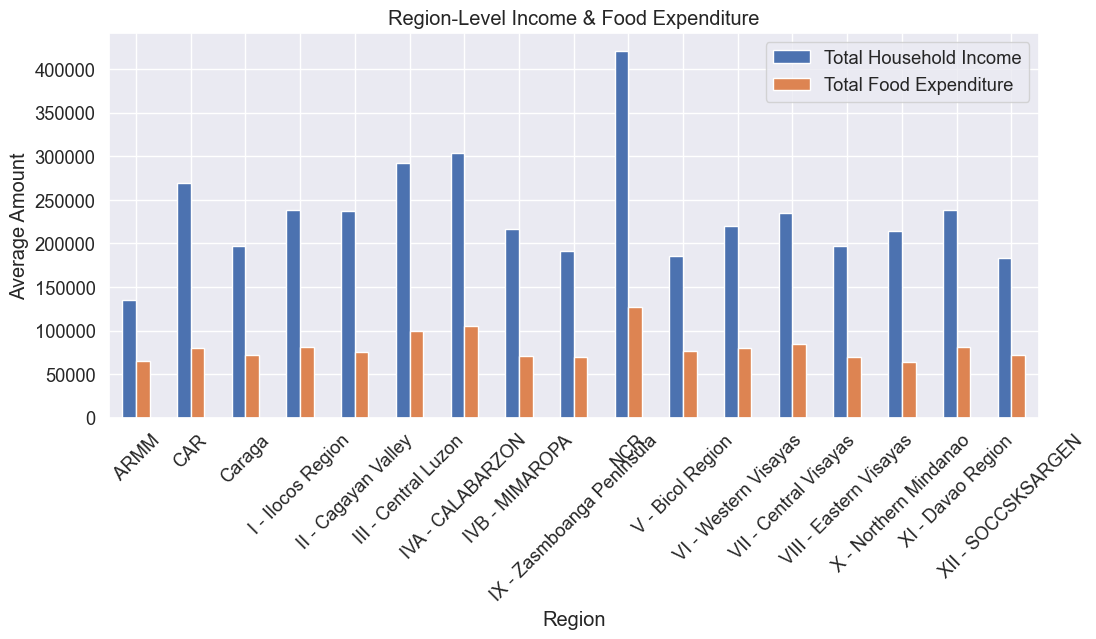

In [96]:
region_compare = df.groupby("Region")[["Total Household Income", "Total Food Expenditure"]].mean()

region_compare.plot(kind="bar", figsize=(12,5))
plt.title("Region-Level Income & Food Expenditure")
plt.ylabel("Average Amount")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


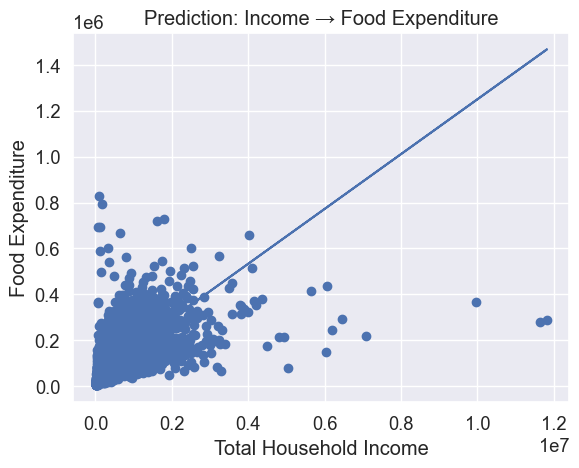

In [97]:
from sklearn.linear_model import LinearRegression

X = df[["Total Household Income"]]
y = df["Total Food Expenditure"]

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), label="Prediction Line")
plt.title("Prediction: Income → Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Food Expenditure")
plt.show()


<hr>
<h2>INSIGHTS 10</h2>
<p>Given that 78.19% of all households are male-headed and they have a higher absolute food expenditure, future increases in national food expenditure will be overwhelmingly driven by the economic and consumption trends affecting male-headed households. For instance, a 10% income shock or growth among male-headed households will have a four-fold greater impact on the total food market size than the same change among female-headed households. </p>
<hr>

<hr>
<h2>INSIGHTS 11</h2>
<p>Regions like VII - Central Visayas and CAR, where female-headed households have demonstrated a significant average income advantage, should be used as models for economic development. Policymakers can predict higher success rates by focusing business and job creation programs on female workers in these areas to further boost average household income.</p>
<hr>

<hr>
<h2>INSIGHTS 12</h2>
<p>The highest income households 400,000 are concentrated in the NCR for both sexes. This region is the primary target for premium, specialty, and discretionary food retailers. Future high-end market growth can be predicted to be most viable here, with male-headed households (427,676 average) being the most lucrative segment for new luxury food product launches. </p>
<hr>

![Image Description](!Demographic Analysis of Philippine Households.png](attachment:75f79f4e-44a0-40df-bffc-442cc86bc98e.png)path/to/your/image.jpg)
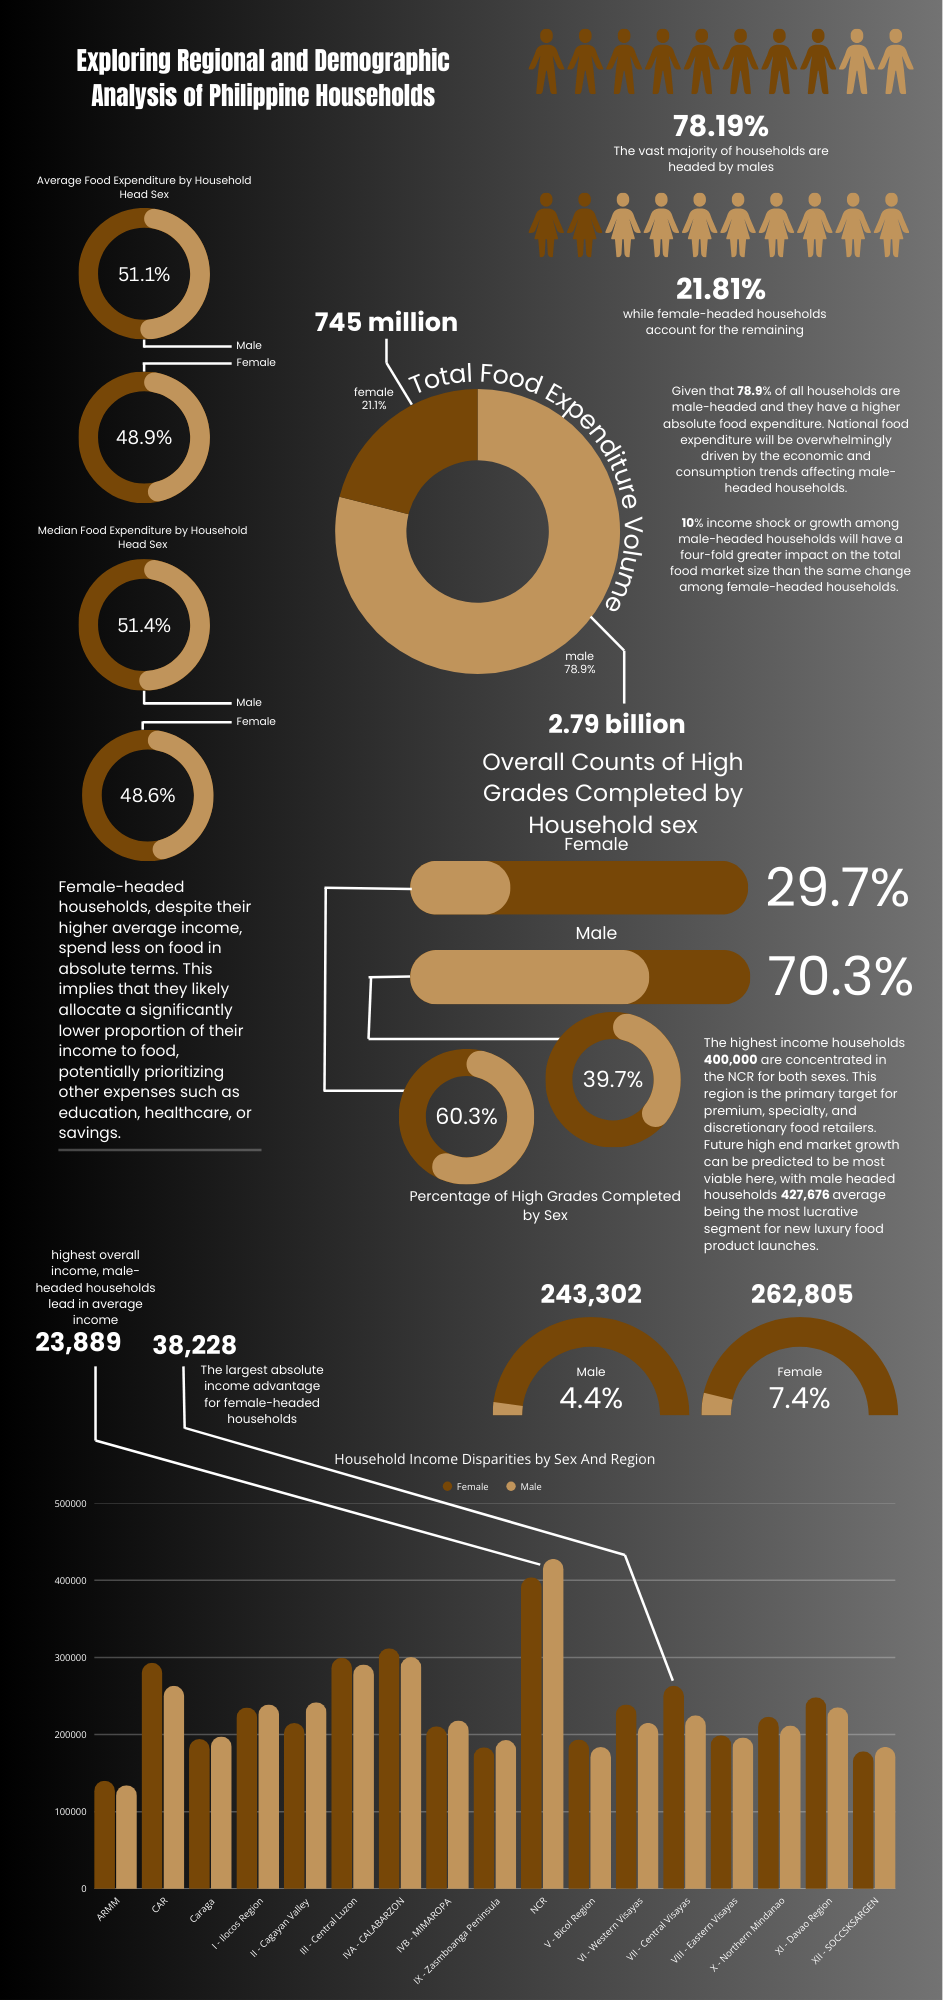